<a href="https://colab.research.google.com/github/FjRabbi/AI_Mouse/blob/master/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
# path='/content/gdrive/MyDrive/Colab Notebooks/Projects/Emotion Detection/Emotion Detection.xlsx'
# my_data = pd.read_excel(path)

In [5]:
# my_data.to_csv (r'/content/gdrive/MyDrive/Colab Notebooks/Projects/Emotion Detection/Emotion Detection.csv', index = None, header=True)


In [6]:
df = df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Projects/Emotion Detection/Emotion Detection.csv')
df

,Text,Type,Sentiment
0,ভালোবাসার মানুষের জন্য কবিতাতো লেখায় যায়,post,Happy
1,ভালোবাসা অবিরাম,comment,Happy
2,মাশাআল্লাহ কি সুন্দর বাচ্চাটা,comment,Happy
3,পল্লী শিশু শাপলা তুলে,post,Happy
4,সবাই কে অসংখ্য ধন্যবাদ,comment,Happy
...,...,...,...
4775,কুত্তা দিয়ে চুদামু,reply,Disgust
4776,তারা কিসের ধার্মিক যে অন্যের ধর্মিয় বিশ্বাসে আ...,comment,Disgust
4777,আঘাত আপনার ই বেশি লাগছে ভাই!,comment,Disgust
4778,"দেব দেবিরে ভাঙ্গা হল, দেব দেবি নিজেকে রক্ষা কর...",comment,Disgust


Selecting Dataframe

In [7]:
df = df[['Text', 'Sentiment']]
df.head()

,Text,Sentiment
0,ভালোবাসার মানুষের জন্য কবিতাতো লেখায় যায়,Happy
1,ভালোবাসা অবিরাম,Happy
2,মাশাআল্লাহ কি সুন্দর বাচ্চাটা,Happy
3,পল্লী শিশু শাপলা তুলে,Happy
4,সবাই কে অসংখ্য ধন্যবাদ,Happy


Emotions Value Count

In [8]:
df['Sentiment'].value_counts()

positive    688
Negative    651
Curosity    500
Disgust     499
Angry       497
Surprise    491
Happy       488
Sad         470
Afraid      250
Anxious     246
Name: Sentiment, dtype: int64

In [9]:
#Remove null values
df = df.dropna()

In [10]:
#Checking Null values
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [11]:
df.describe()

,Text,Sentiment
count,4780,4780
unique,4656,10
top,এটা করা বোকার কাজ।,positive
freq,3,688


Visualization of the data

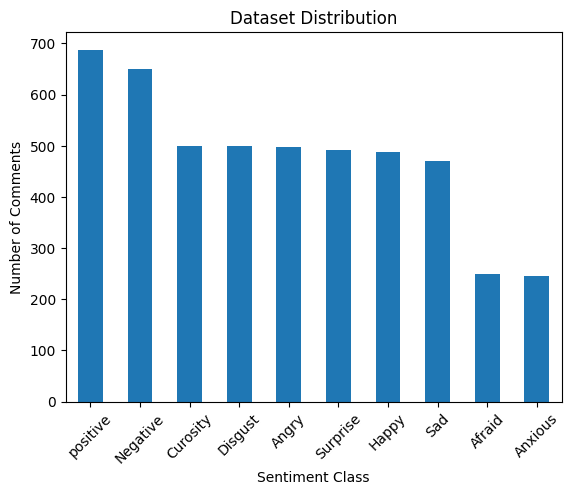

In [12]:
import matplotlib.pyplot as plt
df[ 'Sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Comments")
plt.xticks(rotation =45)
plt.title("Dataset Distribution");

SVM Algorithm

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
X = df['Text']
y = df['Sentiment']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Convert text data to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# Handling Class Imbalance
oversampler = SMOTE()
X_train, y_train = oversampler.fit_resample(X_train, y_train)


# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
svm = SVC(kernel='linear')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Best hyperparameters
best_params = grid_search.best_params_
svm = SVC(kernel='linear', C=best_params['C'], gamma=best_params['gamma'])
svm.fit(X_train, y_train)


SVC(C=100, gamma=0.1, kernel='linear')

In [16]:
svm_Accuracy = svm.score(X_train, y_train)
print("SVM Accuracy: ", svm_Accuracy)

SVM Accuracy:  0.8697416974169742


In [17]:
print("\t\t SVM Confusion Matrix")
# Make predictions on the test set
y_pred = svm.predict(X_train)

# Evaluate the performance of the classifier
print(classification_report(y_train, y_pred))

		 SVM Confusion Matrix
              precision    recall  f1-score   support

      Afraid       0.94      0.92      0.93       542
       Angry       0.79      0.85      0.82       542
     Anxious       0.96      0.93      0.94       542
    Curosity       0.86      0.82      0.84       542
     Disgust       0.98      0.90      0.94       542
       Happy       0.90      0.85      0.87       542
    Negative       0.92      0.90      0.91       542
         Sad       0.62      0.87      0.72       542
    Surprise       0.95      0.87      0.91       542
    positive       0.92      0.79      0.85       542

    accuracy                           0.87      5420
   macro avg       0.88      0.87      0.87      5420
weighted avg       0.88      0.87      0.87      5420



Random Forest Algorithm

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Extract the features and labels
X = df['Text']
y = df['Sentiment']


# Convert text data to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
rf = RandomForestClassifier(**best_params, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=10, n_estimators=300, random_state=42)

In [19]:
# Make predictions on the test set
y_pred = rf.predict(X_train)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_train, y_pred)

print("\n\n Random Forest Accuracy: {:.2f}%".format(accuracy * 100))
print("\n")

print("\t\t  Random Forest Confusion Matrix")
print(classification_report(y_train, y_pred))





 Random Forest Accuracy: 90.79%


		  Random Forest Confusion Matrix
              precision    recall  f1-score   support

      Afraid       0.97      0.92      0.95       207
       Angry       0.84      0.90      0.87       408
     Anxious       0.97      0.93      0.95       200
    Curosity       0.74      0.92      0.82       402
     Disgust       0.98      0.95      0.97       385
       Happy       0.95      0.90      0.92       373
    Negative       0.95      0.93      0.94       539
         Sad       0.88      0.84      0.86       376
    Surprise       0.98      0.94      0.96       392
    positive       0.92      0.87      0.90       542

    accuracy                           0.91      3824
   macro avg       0.92      0.91      0.91      3824
weighted avg       0.91      0.91      0.91      3824



Install BNLP toolkit

In [20]:
pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 49.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=809a99a55d269a4418de4c8d65992148b32bda2b7811673d5f67573cbc466c23
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


Importing Bangla NLP libraries


In [21]:
import bnlp
from bnlp import corpus
from bnlp.corpus import stopwords, digits;
print(stopwords)
print(digits)

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

Data Cleaning

In [22]:
df['Text'] = df['Text'].apply(lambda x:' '.join([x for x in x.split() if x not in df['Text']]))
df['Text'] = df['Text'].str.replace('\d+','')
df

<ipython-input-22-1f594323199d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('\d+','')


,Text,Sentiment
0,ভালোবাসার মানুষের জন্য কবিতাতো লেখায় যায়,Happy
1,ভালোবাসা অবিরাম,Happy
2,মাশাআল্লাহ কি সুন্দর বাচ্চাটা,Happy
3,পল্লী শিশু শাপলা তুলে,Happy
4,সবাই কে অসংখ্য ধন্যবাদ,Happy
...,...,...
4775,কুত্তা দিয়ে চুদামু,Disgust
4776,তারা কিসের ধার্মিক যে অন্যের ধর্মিয় বিশ্বাসে আ...,Disgust
4777,আঘাত আপনার ই বেশি লাগছে ভাই!,Disgust
4778,"দেব দেবিরে ভাঙ্গা হল, দেব দেবি নিজেকে রক্ষা কর...",Disgust


LSTM

In [23]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Sentiment'] = lb.fit_transform(df['Sentiment'])
df

,Text,Sentiment
0,ভালোবাসার মানুষের জন্য কবিতাতো লেখায় যায়,5
1,ভালোবাসা অবিরাম,5
2,মাশাআল্লাহ কি সুন্দর বাচ্চাটা,5
3,পল্লী শিশু শাপলা তুলে,5
4,সবাই কে অসংখ্য ধন্যবাদ,5
...,...,...
4775,কুত্তা দিয়ে চুদামু,4
4776,তারা কিসের ধার্মিক যে অন্যের ধর্মিয় বিশ্বাসে আ...,4
4777,আঘাত আপনার ই বেশি লাগছে ভাই!,4
4778,"দেব দেবিরে ভাঙ্গা হল, দেব দেবি নিজেকে রক্ষা কর...",4


Importing Libraries

In [24]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns

Tokenization

In [25]:
max_features = 5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Text'].values)
X = tokenizer.texts_to_sequences (df['Text'].values)
X = pad_sequences (X)
X

array([[   0,    0,    0, ..., 3902, 3903,   52],
       [   0,    0,    0, ...,    0,  315, 2279],
       [   0,    0,    0, ...,    2,   47,  787],
       ...,
       [   0,    0,    0, ...,  101,  107,   32],
       [   0,    0,    0, ...,  354,   33,   58],
       [   0,    0,    0, ...,    0,    0, 3897]], dtype=int32)

In [26]:
np.shape(X)

(4780, 142)

In [27]:
embed_dim = 64
max_fatures = 5000
model = Sequential()
model.add(Embedding (max_fatures, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 142, 64)           320000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 142, 64)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 353,674
Trainable params: 353,674
Non-trainable params: 0
_________________________________________________________________


In [28]:
Y = pd.get_dummies (df['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 8)
print(X_train. shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(3824, 142) (3824, 10)
(956, 142) (956, 10)


In [29]:
batch_size = 12
history = model.fit(X_train, Y_train, epochs = 10, validation_split=0.1, batch_size=batch_size, verbose = 2)

Epoch 1/10
287/287 - 86s - loss: 2.1804 - accuracy: 0.2037 - val_loss: 2.0153 - val_accuracy: 0.2663 - 86s/epoch - 299ms/step
Epoch 2/10
287/287 - 62s - loss: 1.6643 - accuracy: 0.4394 - val_loss: 1.5648 - val_accuracy: 0.4674 - 62s/epoch - 216ms/step
Epoch 3/10
287/287 - 60s - loss: 1.1723 - accuracy: 0.6071 - val_loss: 1.4378 - val_accuracy: 0.5091 - 60s/epoch - 207ms/step
Epoch 4/10
287/287 - 59s - loss: 0.8359 - accuracy: 0.7312 - val_loss: 1.4862 - val_accuracy: 0.5405 - 59s/epoch - 205ms/step
Epoch 5/10
287/287 - 60s - loss: 0.6504 - accuracy: 0.7925 - val_loss: 1.4985 - val_accuracy: 0.5561 - 60s/epoch - 208ms/step
Epoch 6/10
287/287 - 59s - loss: 0.4881 - accuracy: 0.8466 - val_loss: 1.6053 - val_accuracy: 0.5561 - 59s/epoch - 205ms/step
Epoch 7/10
287/287 - 60s - loss: 0.4026 - accuracy: 0.8750 - val_loss: 1.7272 - val_accuracy: 0.5535 - 60s/epoch - 209ms/step
Epoch 8/10
287/287 - 60s - loss: 0.3340 - accuracy: 0.8977 - val_loss: 1.8984 - val_accuracy: 0.5248 - 60s/epoch - 210

In [30]:
score = model.evaluate(X_train, Y_train, batch_size=64, verbose = 2)
print('Train loss:', score[0])
print('Test accuracy:', score[1])

60/60 - 4s - loss: 0.3163 - accuracy: 0.9192 - 4s/epoch - 64ms/step
Train loss: 0.3162679672241211
Test accuracy: 0.9191945791244507


In [31]:
y_predict = np.argmax(model.predict(X_train), axis = -1)
y_pred = model.predict(X_train)
y_train_class = np.argmax(Y_train, axis = 1)

print("\t\t\t LSTM Confusion Matrix")
print(classification_report(y_train_class, y_predict))
print(confusion_matrix(Y_train.argmax(axis=1), y_pred.argmax(axis=1)))

120/120 [==============================] - 3s 29ms/step
			 LSTM Confusion Matrix
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       200
           1       0.91      0.92      0.92       412
           2       0.89      0.90      0.89       198
           3       0.91      0.95      0.93       399
           4       0.95      0.89      0.92       396
           5       0.95      0.97      0.96       401
           6       0.96      0.96      0.96       516
           7       0.81      0.89      0.85       377
           8       0.93      0.88      0.90       383
           9       0.93      0.89      0.91       542

    accuracy                           0.92      3824
   macro avg       0.92      0.92      0.92      3824
weighted avg       0.92      0.92      0.92      3824

[[190   2   2   3   0   1   0   2   0   0]
 [  2 381   2   6   0   1   6   7   5   2]
 [  4   0 178   3   0   4   0   5   2   2]
 [  2   3   2 380   3   2   1 